In [23]:
from sklearn import datasets
import warnings
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from autocluster.autohypothesis import autohypothesis_utils

In [24]:
star_df = pd.read_csv('star_classification_2.csv')
star_df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [25]:

star_df.rename(columns={"class": "target"}, inplace=True)
star_df.drop(columns=['objid',"fiberid","run","rerun","field","specobjid"], inplace=True)#,"redshift"
_, star_df = train_test_split(star_df, test_size=0.05, stratify=star_df['target'], random_state=42)

In [26]:
# from sklearn.decomposition import PCA


# pca = PCA(n_components=3)
# ugriz = pca.fit_transform(star_df[['u', 'g', 'r', 'i', 'z']])

# # update dataframe 
# star_df = pd.concat((star_df, pd.DataFrame(ugriz)), axis=1)
# star_df.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
# star_df.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)

In [27]:
star_df

,ra,dec,u,g,r,i,z,camcol,target,redshift,plate,mjd
3768,238.494473,0.448091,19.29612,18.08850,17.42183,17.00655,16.74990,5,GALAXY,0.102373,343,51692
5229,183.028618,-1.072708,19.11371,17.37997,16.71033,16.23288,16.00918,1,GALAXY,0.114379,287,52023
5423,260.675191,26.087590,17.58861,16.64228,16.41006,16.31431,16.30884,1,STAR,-0.000977,2182,53905
3376,170.986990,-3.314281,19.48634,19.12819,18.75964,18.47638,18.70265,1,QSO,1.672655,326,52375
2702,151.654714,0.632609,17.70245,16.22431,15.51102,15.15194,14.83453,5,GALAXY,0.021223,269,51910
...,...,...,...,...,...,...,...,...,...,...,...,...
4623,245.177247,0.516165,17.26565,15.99065,15.33806,14.89804,14.63466,5,GALAXY,0.047205,346,51693
2126,221.305359,-0.640111,18.98342,18.00282,17.62617,17.47908,17.44161,2,STAR,0.000059,2909,54653
9218,164.831258,0.793791,19.48619,18.29178,17.74865,17.46060,17.30389,5,GALAXY,0.038446,277,51908
7426,195.021296,67.406990,18.37883,16.32108,15.30301,14.84614,14.49638,4,GALAXY,0.102209,495,51988


In [28]:
exp,X_train, X_dev, y_train, y_dev  = autohypothesis_utils.opti_loop(star_df,500, optimize_obj="dual")

[I 2024-04-23 14:38:47,112] A new study created in memory with name: no-name-b7454030-286c-47d3-8c86-7953bd684cd6
[I 2024-04-23 14:38:47,344] Trial 0 finished with values: [0.8866666666666667, 0.36131842153694194] and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 260, 'rf_max_depth': 31, 'rf_min_samples_split': 0.10629141929212886, 'rf_min_samples_leaf': 0.19836040158490273, 'rf_max_features': 'log2', 'rf_random_state': 42}. 
[I 2024-04-23 14:38:48,079] Trial 1 finished with values: [0.5, 0.0] and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 1000, 'rf_max_depth': 3, 'rf_min_samples_split': 0.07104343304369723, 'rf_min_samples_leaf': 0.4724230447488247, 'rf_max_features': 'log2', 'rf_random_state': 42}. 
[I 2024-04-23 14:38:48,575] Trial 2 finished with values: [0.5, 0.0] and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 680, 'rf_max_depth': 24, 'rf_min_samples_split': 0.6443443085589687, 'rf_min_samples_leaf': 0.4321675854200543, 'rf_max

In [29]:
fig = optuna.visualization.plot_pareto_front(exp, target_names=["Accuracy", "Entropie"], include_dominated_trials=False)
#fig = optuna.visualization.plot_pareto_front(motpe_experiment, target_names=["objective 1", "objective 2"])
fig.layout.title = 'Pareto-front MOTPE'
fig

In [30]:
all_objectives = np.array([trial.values for trial in exp.best_trials ])
#all_objectives = np.unique(all_objectives, axis=0)
sorted_objectives = all_objectives[np.argsort(all_objectives[:, 0])]
spread = np.mean(np.sqrt(np.sum(np.diff(sorted_objectives, axis=0)**2, axis=1)))
# Uniformité
uniformity = np.mean(np.std(np.diff(sorted_objectives, axis=0), axis=0))

# Taille du Front
front_size = len(all_objectives)
all_objectives

array([[0.5       , 1.        ],
       [0.5       , 1.        ],
       [0.99333333, 0.43889888],
       [0.98666667, 0.43982072],
       [0.85333333, 0.49706174],
       [0.86666667, 0.47430792],
       [0.86666667, 0.47430792],
       [0.65333333, 0.72225797],
       [0.62      , 0.72354146],
       [0.5       , 1.        ],
       [0.9       , 0.44798378],
       [0.5       , 1.        ],
       [0.62      , 0.72354146],
       [0.5       , 1.        ]])

In [31]:
exp.best_trials[0].values[0]

0.5

In [32]:
all_results = []
for i in range (0,len(exp.best_trials)-1):
    # Stockage des résultats pour cette itération
    all_results.append({
        "number": exp.best_trials[i].number,
        "accuracy": exp.best_trials[i].values[0],
        "entropy": 1-(exp.best_trials[i].values[1]),
        "params": exp.best_trials[i].params
    })

# Création du DataFrame pour toutes les runs
df_all = pd.DataFrame(all_results)
df_all.to_csv("opti_duo_500_stellar.csv")

In [33]:
params = autohypothesis_utils.get_trial_hyperparams(exp, trial_number=239) #61 #126
pipeline = autohypothesis_utils.rebuild_pipeline_with_hyperparams(params)
pipeline.fit(X_train, y_train)
acc = accuracy_score(y_dev, pipeline.predict(X_dev))
entropy = autohypothesis_utils.clusterEntropy(pipeline, X_dev, pipeline.predict(X_dev))
print(f"Accuracy: {acc:.4f} - Entropy: {1-entropy:.4f}")


Accuracy: 0.5000 - Entropy: 1.0000


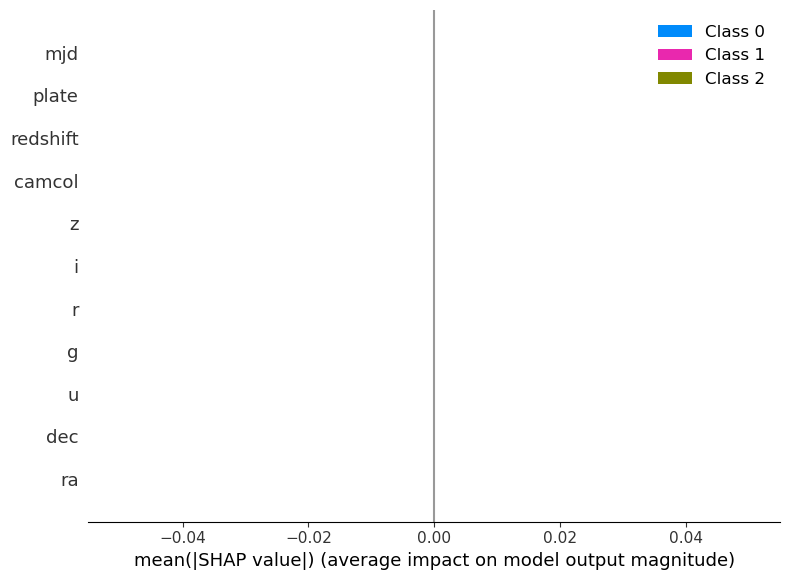

In [34]:
import shap

# Initialize your explainer
explainer = shap.Explainer(pipeline.named_steps['classifier'])

# Compute SHAP values
shap_values = explainer.shap_values(X_dev)

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values, X_dev)


In [35]:
len_x = len(X_dev.columns)
significant_shap_counts = []
for class_shap_values in shap_values:
    vect = np.mean(np.abs(class_shap_values), axis=0)
    sum_I_c_minmax = np.sum(vect)
    I_c_normalized = vect / sum_I_c_minmax
    significant_shap = I_c_normalized > 0.01
    count = np.sum(significant_shap)
    significant_shap_counts.append(count)
    total_significant_shap = np.max(significant_shap_counts)
    percent_significant_shap = np.max(significant_shap_counts)/len_x
    percent_significant_shap

In [36]:
percent_significant_shap

0.0

In [37]:
total_significant_shap

0

In [38]:
import numpy as np

unique_classes = np.unique(y_dev)
random_ids = {}

for cls in unique_classes:
    # Obtenir les indices de toutes les instances de cette classe
    class_indices = np.where(y_dev == cls)[0]
    # Sélectionner aléatoirement un indice parmi ces indices
    random_id = np.random.choice(class_indices)
    random_ids[cls] = random_id

print(random_ids)


{0: 58, 1: 14, 2: 71}


In [39]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][random_ids[0]], X_dev.iloc[random_ids[0]])


In [40]:
row = random_ids[0]
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_dev.iloc[row],  
                                         feature_names=X_dev.columns.tolist()))

ValueError: Image size of -633609871x594 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x650 with 3 Axes>

In [41]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][random_ids[1]], X_dev.iloc[random_ids[1]])

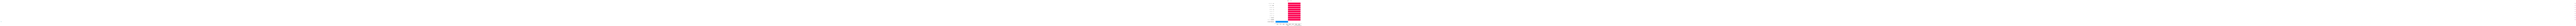

In [42]:
row = random_ids[1]
shap.waterfall_plot(shap.Explanation(values=shap_values[1][row], 
                                              base_values=explainer.expected_value[1], data=X_dev.iloc[row],  
                                         feature_names=X_dev.columns.tolist()))

In [43]:
shap.initjs()
shap.force_plot(explainer.expected_value[2], shap_values[2][random_ids[2]], X_dev.iloc[random_ids[2]])

In [44]:
row = random_ids[2]
shap.waterfall_plot(shap.Explanation(values=shap_values[2][row],
                                              base_values=explainer.expected_value[2], data=X_dev.iloc[row],  
                                         feature_names=X_dev.columns.tolist()))

ValueError: Image size of -609669855x594 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x650 with 3 Axes>